In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_global = pd.read_csv('Global_trend.csv')
df_CPH = pd.read_csv('Copenhagen_trend.csv')

In [21]:
# Add a column for moving average for a dataframe
step = 1
def Add_MV(df,step):
    MV_global = []
    for i in range(0,len(df)):
        if i < step+1:
            MV_global.append(0)
        else:
            MV_global.append(np.average(df['avg_temp'].iloc[i-step:i]))
    df['10_year_MV'] = np.round(MV_global,2)

In [29]:
def plots(step):
    Add_MV(df_global,step)
    Add_MV(df_CPH,step)
    
    year_g = df_global['year'].iloc[step+1:]
    MV_temp_g = df_global['10_year_MV'].iloc[step+1:]
    year_CPH = df_CPH['year'].iloc[step+1:]
    MV_temp_CPH = df_CPH['10_year_MV'].iloc[step+1:]

    fig, ax = plt.subplots()
    ax.plot(year_g, MV_temp_g,'b',year_CPH,MV_temp_CPH,'g')

    ax.set(xlabel='Year', ylabel='Average Temperature ($^\circ$C)',
           title='{} years Moving Average (Global vs. CPH)'.format(step))
    ax.legend(('Global','CPH'))
    ax.grid()
    fig.savefig("Trends_{}_years.png".format(step))


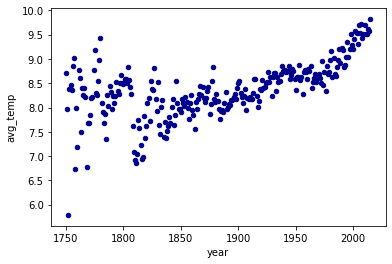

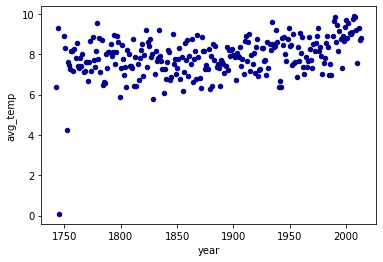

In [41]:
step = 1

year_g = df_global['year'].iloc[10:]
MV_temp_g = df_global['avg_temp'].iloc[10:]
year_CPH = df_CPH['year'].iloc[10:]
MV_temp_CPH = df_CPH['avg_temp'].iloc[10:]

df_global.plot.scatter('year', 'avg_temp', c = 'DarkBlue')
df_CPH.plot.scatter('year', 'avg_temp', c = 'DarkBlue')
#,year_CPH,MV_temp_CPH,'g'

# ax.set(xlabel='Year', ylabel='Average Temperature ($^\circ$C)',
#        title='{} years Moving Average (Global vs. CPH)'.format(step))
# ax.legend(('Global','CPH'))
# ax.grid()
# fig.savefig("New_Trends_{}_years.png".format(step))
# # for step in range(1,20):
#     print('Printing: step = {} years'.format(step))
#     plots(step)

In [73]:
from sklearn.linear_model import LinearRegression
x = np.array(year_g[-40:-1]).reshape((-1, 1))
x[-40:-1]
y = MV_temp_g[-40:-1]
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope: ', model.coef_)


coefficient of determination: 0.7655116361214637
intercept: -45.15871794871796
slope:  [0.02723887]


In [95]:
# correlation coefficient
from scipy.stats import pearsonr
data1 = df_global.iloc[:-2]['avg_temp']
data2 = df_CPH.iloc[7:]['avg_temp']
corr, _ = pearsonr(data1,data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.507


In [100]:
x = np.array(data1).reshape((-1, 1))
y = np.array(data2)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination: 0.2573711994393336
intercept: 1.5701951527990445
slope:  [0.75859063]
